# Ejercicios

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path
data_path = Path('../Estructura_de_Datos/house.csv')

In [7]:
data = pd.read_csv(data_path)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
#El primer ejercicio tiene tres apartados:
#1. Crear una nueva columna con el nombre 'price_grp'. Esta columna tendrá como valores del 0 al 5 y el 
#0 es el 20% de los precios más bajos y el 5 es el 20% de los precios más altos.
data['price_grp'] = pd.qcut(data['price'], q=5, labels=np.arange(5))
data.head()
#Con qcut se pueden dividir los datos en diferentes grupos, en este caso se dividen en 5 grupos y se les asigna un valor del 0 al 5.
#Labels se utiliza para asignar los valores del 0 al 5 a los grupos.

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_grp
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,4
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,3


In [12]:
#2. Hay que comprobar si hay valores missings y si los hay, hay que sustituirlos por la mediana de la columna:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
price_grp        0
dtype: int64

In [14]:
#3. El precio medio de las casas:
price_mean = data['price'].mean()
print(price_mean)

551962.9884732141


In [21]:
#En el ejercicio 2, tenemos que generar un dataframe que contenga el nº medio de baños y plantas por 
#cada valor de la variable condition.
#Hay que generar otro dataframe con el precio min y max por cada valor de la variable condition
#Por último, hay que unir los dos dataframes

df1 = data.groupby('condition').agg({
    'bathrooms': [np.mean],
    'floors' : [np.mean]
})
df1

,bathrooms,floors
,mean,mean
condition,,
1,1.166667,1.083333
2,1.437500,1.156250
3,2.276957,1.651130
4,1.935903,1.277157
5,2.107471,1.301149


In [23]:
df2 = data.query('price > 0').groupby('condition').agg({
    'price': [np.max, np.min],
})
df2

price         
                  max      min
condition                     
1            550000.0   7800.0
2           2555000.0  80000.0
3          12899000.0  83000.0
4          26590000.0  83300.0
5           3200000.0  83300.0

In [24]:
#Vamos a unir ambos dataframes con un merge que tenga un inner join en base a la variable condition:
df3 = df1.merge(df2, how='inner', on='condition')
df3

bathrooms    floors       price         
               mean      mean         max      min
condition                                         
1          1.166667  1.083333    550000.0   7800.0
2          1.437500  1.156250   2555000.0  80000.0
3          2.276957  1.651130  12899000.0  83000.0
4          1.935903  1.277157  26590000.0  83300.0
5          2.107471  1.301149   3200000.0  83300.0

In [57]:
#En el ejercicio 3, tenemos que generar una tabla pivotante que muestre el precio medio por planta y condición(floors y condition),
# tiene que quedar esto:
#La casa con 1 panta con condicion 1 tiene un precio media de x, la casa con 1 planta con condicion 2 tiene una media de precio de x, etc.
df4 = pd.pivot_table(data = data, index='condition', columns='floors', values='price', aggfunc='mean')
df4


floors,1.0,1.5,2.0,2.5,3.0,3.5
condition,,,,,,
1,282560.000000,427000.000000,NaN,NaN,NaN,NaN
2,244226.000000,304077.500000,1.019333e+06,NaN,NaN,NaN
3,446558.941667,526978.427474,6.229194e+05,8.089961e+05,5.258662e+05,829250.0
4,466853.537631,577914.810000,6.882935e+05,1.099125e+06,1.693125e+06,NaN
5,493234.266846,698686.446947,9.978914e+05,2.038333e+06,7.700000e+05,NaN


In [58]:
#Luego tenemos que rellenar los valores missing con 0:
df4.fillna(value=0, inplace=True)
df4


floors,1.0,1.5,2.0,2.5,3.0,3.5
condition,,,,,,
1,282560.000000,427000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0
2,244226.000000,304077.500000,1.019333e+06,0.000000e+00,0.000000e+00,0.0
3,446558.941667,526978.427474,6.229194e+05,8.089961e+05,5.258662e+05,829250.0
4,466853.537631,577914.810000,6.882935e+05,1.099125e+06,1.693125e+06,0.0
5,493234.266846,698686.446947,9.978914e+05,2.038333e+06,7.700000e+05,0.0


<Axes: xlabel='condition'>

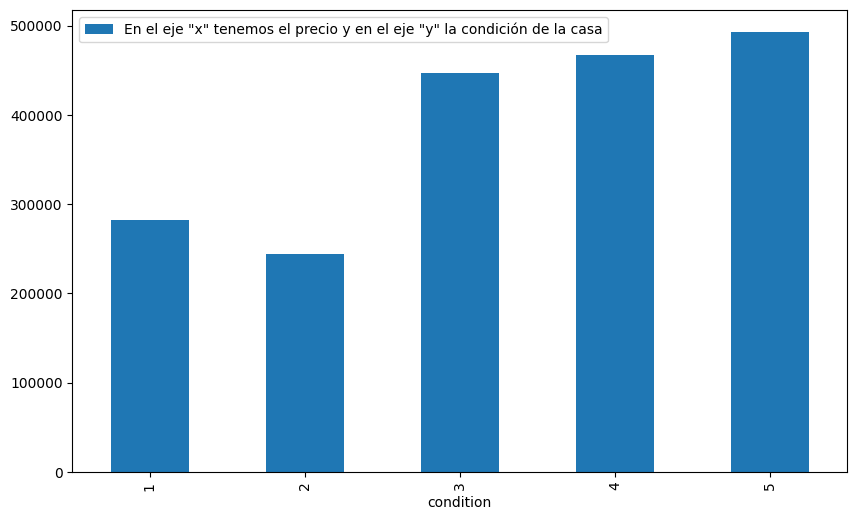

In [63]:
#Por ultimo nos pide que presentemos los valores de las casas de una planta en un gráfico de barras:
df4.columns
df4[1.0].plot(kind = 'bar', figsize=(10,6), legend=True, label='En el eje "x" tenemos el precio y en el eje "y" la condición de la casa')
